In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('/content/titanic_train.csv')
df_test = pd.read_csv('/content/titanic_test.csv')

df_train.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
5,3,0,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q,NaN,NaN
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,NaN,NaN
7,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,NaN,"Plymouth, Devon / Detroit, MI"
8,1,0,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C,NaN,"Haverford, PA"
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,NaN,"St Louis, MO"


In [ ]:
df_train.info()
print("\n\n-----------------------\n\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


-----------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393

In [ ]:
df_train = df_train.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
df_test = df_test.drop(['name', 'ticket', 'body', 'cabin', 'home.dest'], axis=1)
# 행: 0, 열: 1

In [ ]:
# 탐색적 데이터 분석
print(df_train['survived'].value_counts())
print("\n\n------------------------\n\n")
print(df_test['survived'].value_counts())



survived
0    563
1    353
Name: count, dtype: int64


------------------------


survived
0    246
1    147
Name: count, dtype: int64


<Axes: xlabel='survived'>

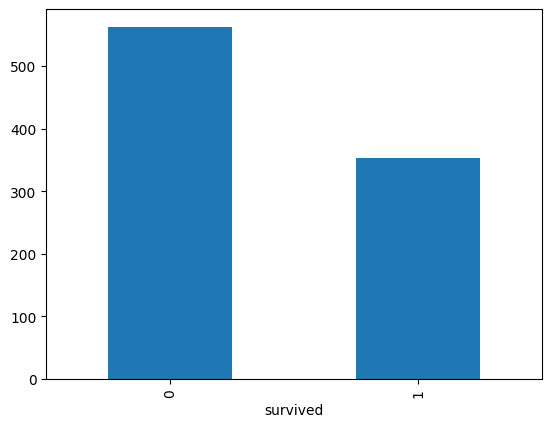

In [ ]:
df_train['survived'].value_counts().plot.bar()

In [ ]:
# 데이터 탐색 자동화 메서드작성(valid_features)

# 두 그룹 간의 분포를 비교하는 그래프를 출력
# 두 그룹 각각의 표준편차를 출력
# 두 그룹 간의 t-test 검정을 실시하여 출력
# Shapiro-wilk 검정 출력

from matplotlib.pyplot import hist
from scipy import stats
from pandas import DataFrame

# Scipy

def valid_features(df: DataFrame, col_name: str, distribution_check: bool = True):
    print(f"\n\n ------ [ {col_name} ] ------------ \n\n")

    # 두 집단(survived=[1, 0])의 분포 그래프 출력
    g = sns.FacetGrid(df, col='survived')
    g.map(hist, col_name, bins=30)

    # 두 집단의 표준편차 출력
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("표준편차는 ", "%.2f" % np.std(titanic_survived_static))

    titanic_not_survived = df[df['survived']==0]
    titanic_not_survived_static = np.array(titanic_not_survived[col_name])
    print("표준편차는 ", "%.2f" % np.std(titanic_not_survived_static))

    if distribution_check:
        # Shapiro_Wilk검정: 분포의 정규성 정도를 검증
        print('The w-static and p-value in Survived %.3f and %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('The w-static and p-value in Non-survived %.3f and %.3f' % stats.shapiro(titanic_not_survived[col_name]))
        print("\n\n")







 ------ [ age ] ------------ 


표준편차는  14.22
표준편차는  13.71
The w-static and p-value in Survived 0.982 and 0.001
The w-static and p-value in Non-survived 0.968 and 0.000





 ------ [ sibsp ] ------------ 


표준편차는  0.64
표준편차는  1.34


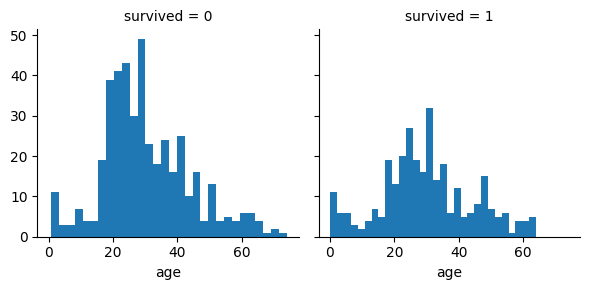

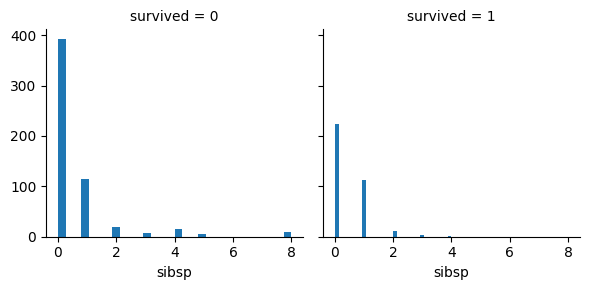

In [ ]:
# 자동화 함수 실행
# AGE, SIBSP 피처,
valid_features(df_train[df_train['age'] > 0], 'age')

valid_features(df_train, 'sibsp', distribution_check=False)


In [ ]:
# 분류 모델
# 로지스틱 회귀 모델(Logistic regression)

# 예측 값 Y 0~1

In [ ]:
# age의 결측값 -> 평균값
# embark -> 최빈값

replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

whole_df = pd.concat([df_train, df_test])
train_idx_num = len(df_train)

whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()



,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,True,False,False,False,True
1,2,1,4.000000,1,1,23.0000,True,False,False,False,True
2,2,1,30.000000,1,0,13.8583,True,False,True,False,False
3,3,0,30.231444,0,0,7.7250,False,True,False,True,False
4,3,1,22.000000,0,0,7.7250,True,False,False,True,False


In [ ]:
# 로지스틱회귀모델

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 학습 데이터, 테스트 데이터 분리
x_train, y_train = df_train.loc[:, df_train.columns!='survived'].values, df_train['survived'].values

x_test, y_test = df_test.loc[:, df_train.columns!='survived'].values, df_test.loc[:, df_test.columns=='survived'].values

# LogisticRegression 모델 학습
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트데이터셋에 대해서 예측 결과 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]


In [ ]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표를 각각 출력합니다.
print("정확도: %.2f" % accuracy_score(y_test, y_pred))
print("정밀도: %.3f" % precision_score(y_test, y_pred))
print("재현도: %.3f" % recall_score(y_test, y_pred))
print("특이도: %.3f" % recall_score(y_test, y_pred, pos_label=0))
print("F1: %.3f" % f1_score(y_test, y_pred))

정확도: 0.80
정밀도: 0.756
재현도: 0.673
특이도: 0.870
F1: 0.712


In [ ]:
# 분류모델 평가 기준
# 혼동행렬(ConfusionMatrix)

# F1-score: 정밀도, 재현도의 조화 평균 값
# ROC Curve:
# AUC 1

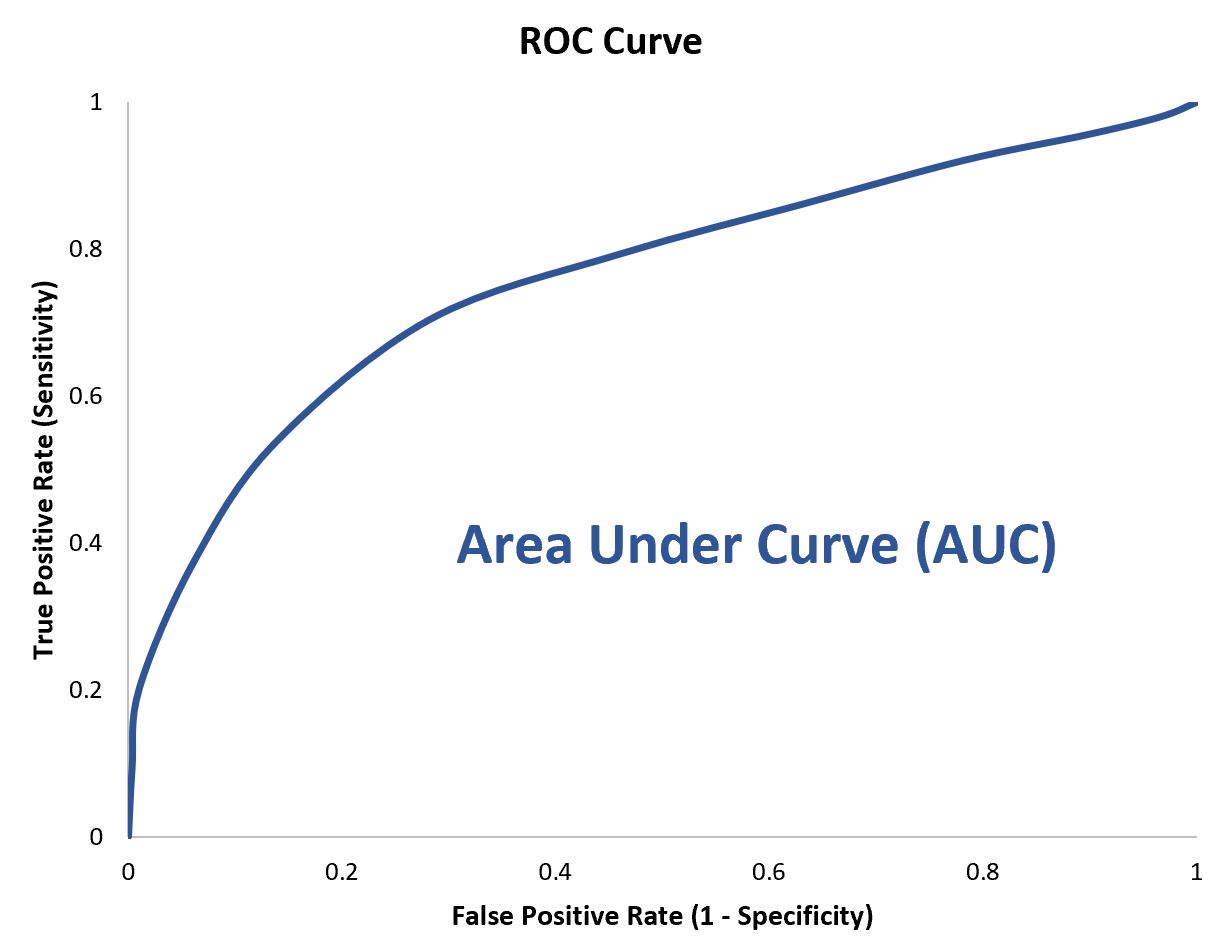

1. True Positive: 1인 값을 1이라 하는경우
2. False Negative: 1인 값을 0이라 하는 경우
3. False Positive: 0인 값을 1이라 하는 경우
4. True Negative: 0인 값을 0이라 하는 경우

정확도(Accuracy): (TP + TN) / (TP+TN + FP + FN)

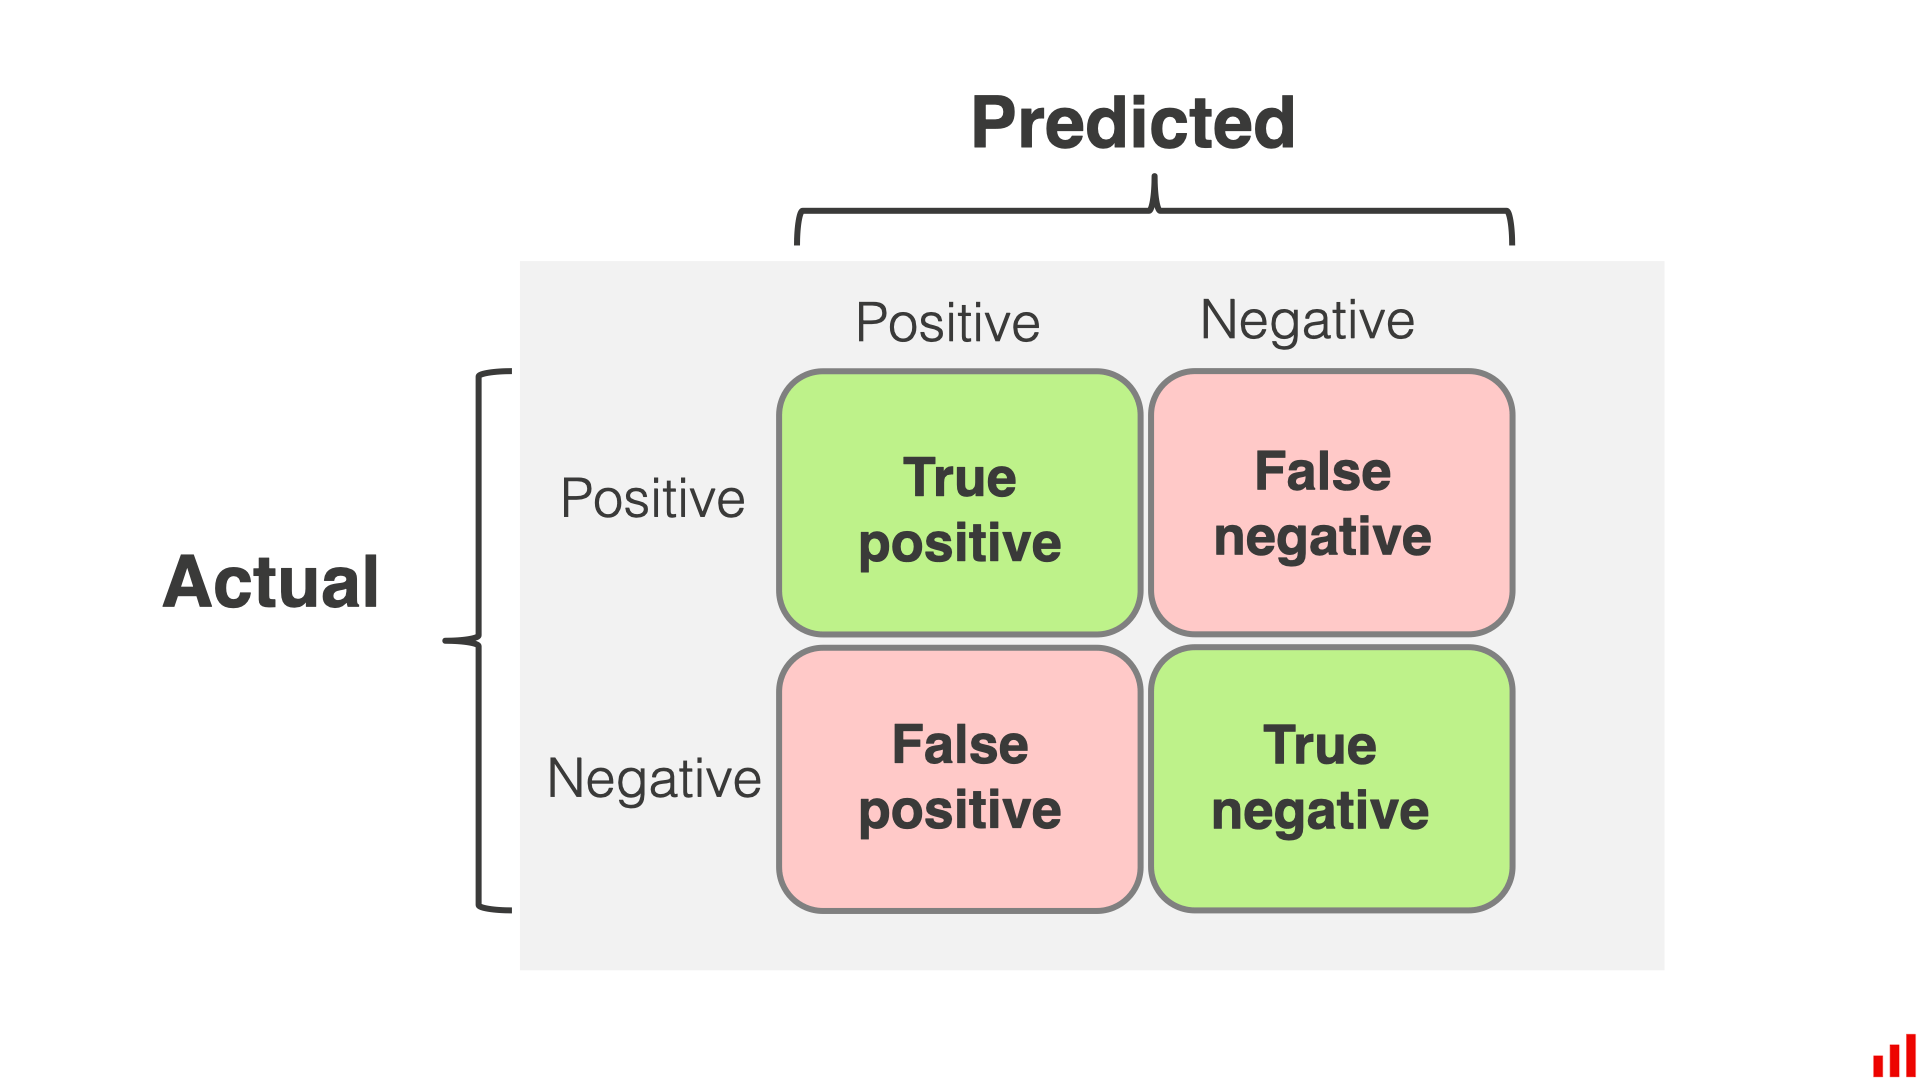

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

array([[214,  32],
       [ 48,  99]])

AUC: 0.838


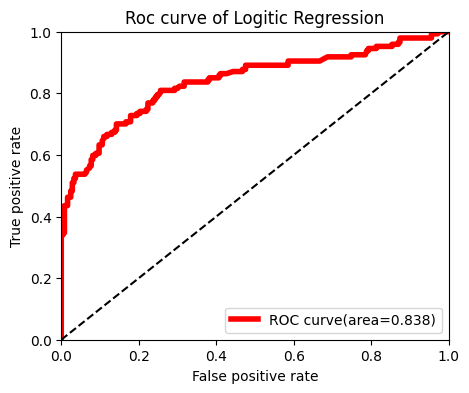

In [ ]:
# AUC 출력

from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

# ROC Curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area=%0.3f)' % roc_auc, color='red', linewidth=4.0)

plt.plot([0,1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.title('Roc curve of Logitic Regression')

plt.legend(loc='lower right')
plt.show()